<a href="https://colab.research.google.com/github/Sara-aljaafar/ML_Portfolio/blob/main/NLP_Sentiment_Analysis_Project_Sara_Al_jaafar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers.
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


#Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information.
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones.
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations.
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


#Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words
- Create Word Cloud


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews.


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [1]:
import tensorflow as tf
import os

# Note that the `tpu` argument is for Colab-only
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [2]:
strategy = tf.distribute.TPUStrategy(resolver)

In [3]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from warnings import filterwarnings
filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
!pip install transformers

In [5]:
# Import necessary libraries
from wordcloud import WordCloud  # For creating word clouds
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer  # For text vectorization

from sklearn.model_selection import train_test_split  # For splitting the dataset
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    f1_score,
    recall_score,
    accuracy_score,
    precision_score,
    roc_auc_score,
)  # For model evaluation metrics
from sklearn.model_selection import cross_validate  # For cross-validation
from sklearn.metrics import (
    average_precision_score,
    PrecisionRecallDisplay,
    precision_recall_curve,
    auc,
)  # For precision-recall curve
from sklearn.metrics import make_scorer  # For creating custom scorers

from sklearn.naive_bayes import MultinomialNB, BernoulliNB  # Naive Bayes classifiers
from sklearn.linear_model import LogisticRegression  # Logistic Regression classifier
from sklearn.svm import LinearSVC  # Support Vector Machine classifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier  # Ensemble classifiers

from tensorflow.keras.models import Sequential  # For building a sequential model
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout  # Layers for neural network
from tensorflow.keras.optimizers import Adam  # Optimizer for training neural network
from sklearn.utils import class_weight  # For computing class weights
from tensorflow.keras.callbacks import EarlyStopping  # Callback for early stopping

from tensorflow.keras.preprocessing.text import Tokenizer  # For tokenizing text data
from tensorflow.keras.preprocessing.sequence import pad_sequences  # For padding sequences
from transformers import AutoTokenizer  # For using pre-trained transformers


In [6]:
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [7]:
df=pd.read_csv('Womens Clothing E-Commerce Reviews.csv') #reading data.

In [8]:
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [9]:
 df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [10]:
df_copy=df.drop(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Rating'
       ,'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'], axis=1) #removing unnecessary columns.

### Data Wrangling

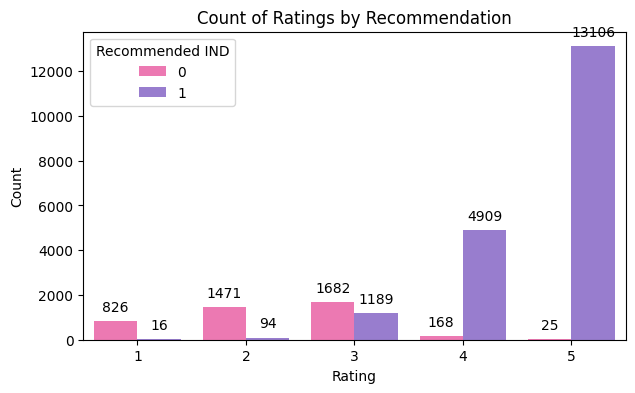

In [11]:
# Define custom pink and purple colors
pink_purple_palette = ["#FF66B2", "#9370DB"]

plt.figure(figsize=(7, 4))

# Create a grouped bar chart with the custom color palette
ax = sns.countplot(x="Rating", hue="Recommended IND", data=df, palette=pink_purple_palette)

# Adding labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title("Count of Ratings by Recommendation")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


#### Check Proportion of Target Class Variable:

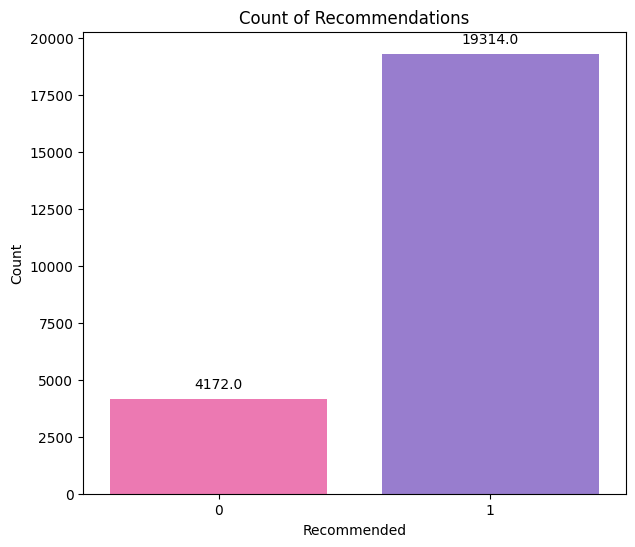

In [12]:
# Define custom colors
colors = ["#FF66B2", "#9370DB"]

plt.figure(figsize=(7, 6))

# Create a count plot with custom colors
ax = sns.countplot(x="Recommended IND", data=df, palette=colors)

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title("Count of Recommendations")
plt.xlabel("Recommended")
plt.ylabel("Count")
plt.show()

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [13]:
df_copy = df_copy.rename(columns={"Recommended IND": "target", "Review Text": "text"})
df_copy.head()

,text,target
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


### Missing Value Detection

In [14]:
df_copy['target'].value_counts() # COUNT No. of each target.

1    19314
0     4172
Name: target, dtype: int64

In [15]:
df_copy.value_counts('target', normalize=True)

target
1    0.822362
0    0.177638
dtype: float64

In [16]:
df_copy.isna().sum() #check null values.

text      845
target      0
dtype: int64

In [17]:
df_copy.dropna(inplace=True) #drop null values.

In [18]:
df_copy.isna().sum()

text      0
target    0
dtype: int64

In [19]:
df_copy.duplicated().sum() #summation of duplicated values.

7

In [20]:
df_copy.drop_duplicates(inplace=True) #drop duplicates values.

In [21]:
df_copy.duplicated().sum()

0

In [22]:
df_copy.reset_index(drop=True, inplace=True) #reset index
df_copy

,text,target
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
...,...,...
22629,I was very happy to snag this dress at such a ...,1
22630,"It reminds me of maternity clothes. soft, stre...",1
22631,"This fit well, but the top was very see throug...",0
22632,I bought this dress for a wedding i have this ...,1


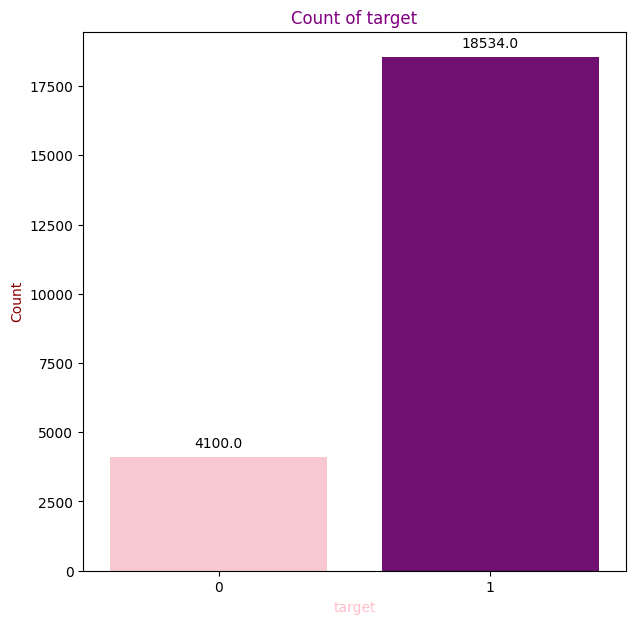

In [23]:
# Set the figure size
plt.figure(figsize=(7, 7))

# Choose pink and purple colors
pink_color = '#FFC0CB'
purple_color = '#800080'

# Create a count plot with pink and purple colors
ax = sns.countplot(x="target", data=df_copy, palette=[pink_color, purple_color])

# Add count labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set plot title and labels with custom colors
plt.title("Count of target", color='purple')  # Set title color
plt.xlabel("target", color='pink')  # Set x-axis label color
plt.ylabel("Count", color='darkred')  # Set y-axis label color

# Show the plot
plt.show()


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma).
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method.


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [24]:
# Importing the English stopwords from the NLTK library
stop_words = set(stopwords.words('english'))

# Creating a set of words to exclude for negation analysis
words_to_exclude = {"no", "not"}

# Removing specified words from the set of stopwords for sentiment analysis or text processing
stop_words.difference_update(words_to_exclude)

In [25]:
def cleaning(data):

    #1. Tokenize
    text_tokens = word_tokenize(data.replace("'", "").lower())

    #2. Remove Puncs and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]

    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]

    #joining
    return " ".join(text_cleaned)

In [26]:
df_copy

,text,target
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
...,...,...
22629,I was very happy to snag this dress at such a ...,1
22630,"It reminds me of maternity clothes. soft, stre...",1
22631,"This fit well, but the top was very see throug...",0
22632,I bought this dress for a wedding i have this ...,1


## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words
- Create Word Cloud


### Detect Reviews (positive and negative separately)

In [27]:
# Extracting the positive class (assuming 'target' is the binary class column)
class_positive = df_copy[df_copy['target'] == 1]['text']

# Applying a cleaning function to the text data
class_positive = class_positive.apply(cleaning)

# Display the cleaned positive class
class_positive

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store im ...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
6        aded basket hte last mintue see would look lik...
                               ...                        
22628    wasnt sure ordering skirt couldnt see person f...
22629    happy snag dress great price easy slip flatter...
22630    reminds maternity clothes soft stretchy shiny ...
22632    bought dress wedding summer cute unfortunately...
22633    dress lovely platinum feminine fit perfectly e...
Name: text, Length: 18534, dtype: object

In [28]:
# Extracting the negative class (assuming 'target' is the binary class column)
class_negative = df_copy[df_copy['target'] == 0]['text']

# Applying a cleaning function to the text data
class_negative = class_negative.apply(cleaning)

# Display the cleaned negative class
class_negative


2        high hope dress really wanted work initially o...
5        love tracy reese dress one not petite foot tal...
10       dress run small esp zipper area run ordered sp...
22       first not pullover styling side zipper wouldnt...
25       loved material didnt really look long dress pu...
                               ...                        
22599    tried color really pretty fun donset want pair...
22600    wanted love jacket soft great color unfortunat...
22610    purchased good price typically love maeve fabr...
22627    surprised positive review product terrible cut...
22631    fit well top see never would worked im glad ab...
Name: text, Length: 4100, dtype: object

### Collect Words (positive and negative separately)

In [29]:
# Joining elements of the 'class_positive' list into a string
positive_w = " ".join(class_positive)
# Displaying the resulting string containing positive words
positive_w[:1000]



'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt aded basket hte last mintue see would look like person store pick went teh darkler color pale hte color really gorgeous turn mathced everythiing trying prefectly little baggy hte x hte msallet size bummer no petite decided jkeep though said matvehd everything ejans pant skirt waas trying kept oops ordered carbon store pick ton stuff always try used top pair skirt pant everything went color really nice charcoal shimmer went well pencil skirt flare pant etc compaint bit big sleeve long doesnt go petite also bit loose no xx kept wil ldecide later since light color alread

In [30]:
# Joining elements of the 'class_negative' list into a string
negative_w = " ".join(class_negative)
# Displaying the resulting string containing negative words
negative_w[:1000]

'high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could not zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c love tracy reese dress one not petite foot tall usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame not stranger alteration shortening narrowing skirt would take away embellishment garment love color idea style not work returned dress dress run small esp zipper area run ordered sp typically fit tight material top look feel cheap even pulling cause rip fabric pretty disappointed going christmas dress year needle say going back first not pullover styling side zipper wouldnt purchased knew side zipper large bust side zipper next impossible second tulle feel look cheap slip awkward tight shape underneath not look like described sadly returning im sure fi

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [31]:
# Creating a WordCloud object for visualization with specified parameters
wordcloud_pos = WordCloud(background_color="green",
                               max_words =250,
                               scale=3)

In [32]:
wordcloud_pos.generate(positive_w)

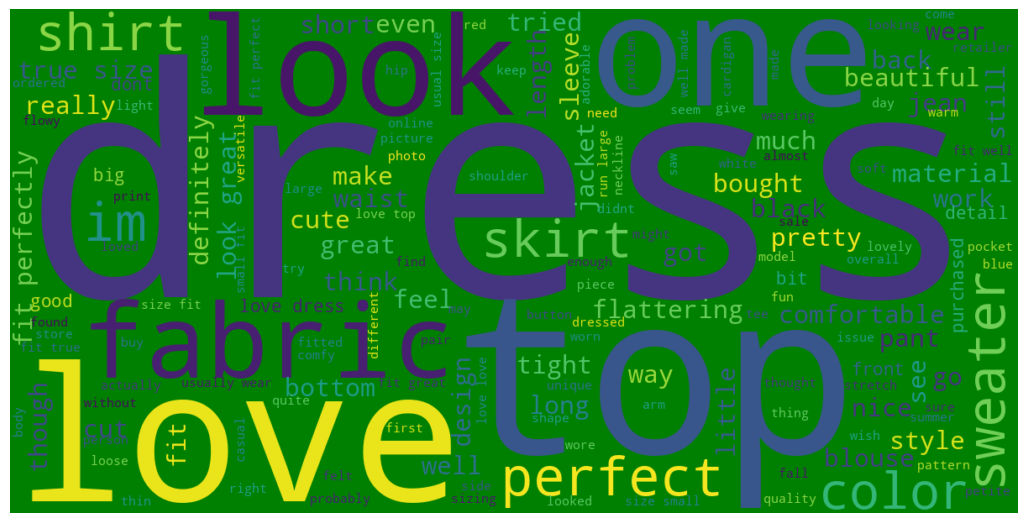

In [33]:
plt.figure(figsize = (13,13))
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.show()

In [34]:
# Creating a WordCloud object for visualization with specified parameters
wordcloud_neg = WordCloud(background_color="red",
                               max_words =250,
                               scale=3)


In [35]:
wordcloud_neg.generate(negative_w)


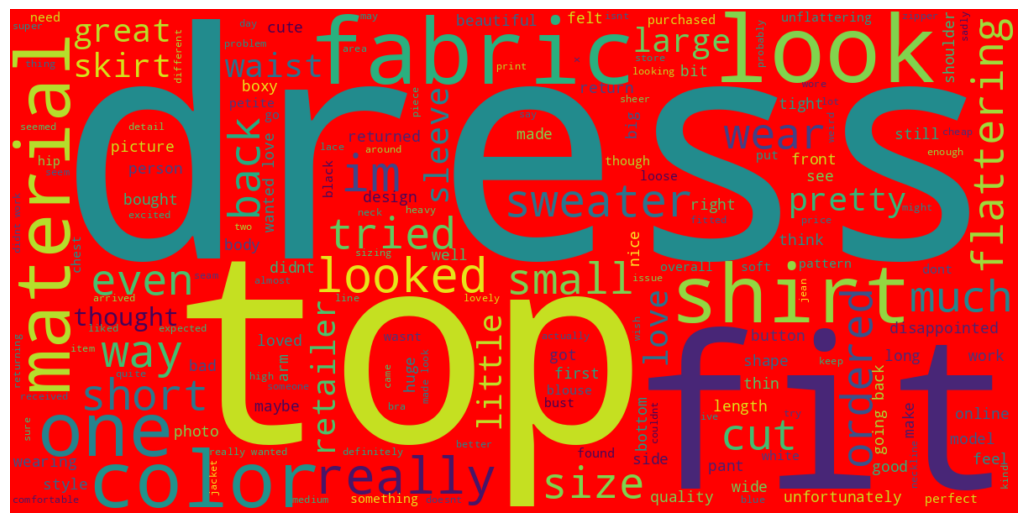

In [36]:
plt.figure(figsize = (13,13))
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.**

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [37]:
# Extracting features (X) and target variable (y) from the DataFrame
X = df_copy["text"].values  # X is the text data column
y = df_copy["target"].map({0: 1, 1: 0}).values  # Mapping target variable (binary classification)

# The 'text' column is assigned to X, representing the input features (text data)
# The 'target' column is assigned to y, and it's mapped such that:
#   - 0 in the original 'target' becomes 1 in y
#   - 1 in the original 'target' becomes 0 in y
# This is commonly done in binary classification to switch labels for convenience (0 becomes negative, 1 becomes positive)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.1,
                                                    stratify=y,
                                                    random_state=101)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [39]:
# Creating a CountVectorizer instance for text vectorization
vectorizer = CountVectorizer(
    preprocessor=cleaning,  # Specify a preprocessor function for text cleaning
    min_df=3,               # Ignore terms that have a document frequency strictly lower than this threshold
    max_df=0.90             # Ignore terms that have a document frequency strictly higher than this threshold
)

# Transforming the training data with CountVectorizer
X_train_count = vectorizer.fit_transform(X_train)

# Transforming the test data with the same CountVectorizer
X_test_count = vectorizer.transform(X_test)

# The 'cleaning' function is applied as a preprocessor to clean the text data
# The terms (words) appearing in less than 3 documents or more than 90% of the documents are ignored
# The resulting X_train_count and X_test_count are sparse matrices representing the document-term matrix

In [40]:
# Converting the sparse matrix X_train_count to a dense array
X_train_count_array = X_train_count.toarray()

# The resulting X_train_count_array is a dense array representation of the document-term matrix
# Each row corresponds to a document, and each column corresponds to a unique term (word)
# The array contains the count of each term in the respective documents

In [41]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

,aa,ab,abby,abdomen,ability,able,abo,absolute,absolutely,absolutley,...,zero,zig,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
20366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [42]:
# Creating a TfidfVectorizer instance for text vectorization
tf_idf_vectorizer = TfidfVectorizer(
    preprocessor=cleaning,  # Specify a preprocessor function for text cleaning
    min_df=3,               # Ignore terms that have a document frequency strictly lower than this threshold
    max_df=0.90             # Ignore terms that have a document frequency strictly higher than this threshold
)

# Transforming the training data with TfidfVectorizer
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)

# Transforming the test data with the same TfidfVectorizer
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

# The 'cleaning' function is applied as a preprocessor to clean the text data
# The terms (words) appearing in less than 3 documents or more than 90% of the documents are ignored
# The resulting X_train_tf_idf and X_test_tf_idf are sparse matrices representing the TF-IDF matrices

In [43]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [44]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

,aa,ab,abby,abdomen,ability,able,abo,absolute,absolutely,absolutley,...,zero,zig,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.186525,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.15993,0.0,0.0,0.0,0.0
20366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
20367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
20368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0


### Eval Function

In [45]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

## Logistic Regression

### CountVectorizer

In [46]:
log = LogisticRegression(C=0.01,
                         max_iter=1000,
                         class_weight= "balanced",
                         random_state=101)
log.fit(X_train_count,y_train)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [47]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

LOG MODEL
[[1569  285]
 [  57  353]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      1854
           1       0.55      0.86      0.67       410

    accuracy                           0.85      2264
   macro avg       0.76      0.85      0.79      2264
weighted avg       0.89      0.85      0.86      2264

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     16680
           1       0.58      0.88      0.70      3690

    accuracy                           0.86     20370
   macro avg       0.77      0.87      0.80     20370
weighted avg       0.90      0.86      0.87     20370



In [48]:
scoring= ["accuracy", "f1", "recall", "precision"]

model = LogisticRegression(C =0.01,
                           max_iter=1000,
                           class_weight= "balanced",
                           random_state=101)
scores = cross_validate(model,
                        X_train_count,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.850515
train_accuracy     0.861179
test_f1            0.672760
train_f1           0.697119
test_recall        0.847967
train_recall       0.881903
test_precision     0.557655
train_precision    0.576357
dtype: float64

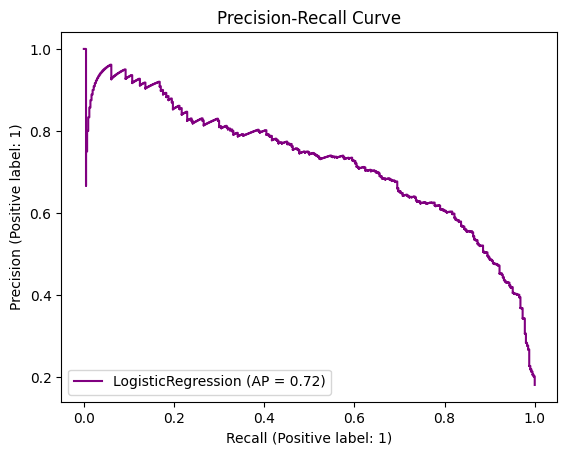

In [49]:
# Plot precision-recall curve
disp = PrecisionRecallDisplay.from_estimator(log, X_test_count, y_test, color='purple')
disp.ax_.set_title('Precision-Recall Curve')
plt.show()

In [50]:
y_pred = log.predict(X_test_count)
y_pred_proba= log.predict_proba(X_test_count)[:,1]

log_AP_count = average_precision_score(y_test, y_pred_proba)
log_count_rec = recall_score(y_test, y_pred)
log_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [51]:
log = LogisticRegression(C=0.06,
                         max_iter=1000,
                         random_state=101,
                         class_weight="balanced")
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.06, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [52]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL
[[1550  304]
 [  52  358]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      1854
           1       0.54      0.87      0.67       410

    accuracy                           0.84      2264
   macro avg       0.75      0.85      0.78      2264
weighted avg       0.89      0.84      0.86      2264

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.84      0.90     16680
           1       0.55      0.88      0.68      3690

    accuracy                           0.85     20370
   macro avg       0.76      0.86      0.79     20370
weighted avg       0.90      0.85      0.86     20370



In [53]:
model = LogisticRegression(C=0.06,
                           max_iter=1000,
                           random_state=101,
                           class_weight="balanced")
scores = cross_validate(model,
                        X_train_tf_idf,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.842563
train_accuracy     0.850434
test_f1            0.664432
train_f1           0.682163
test_recall        0.860434
train_recall       0.886028
test_precision     0.541258
train_precision    0.554566
dtype: float64

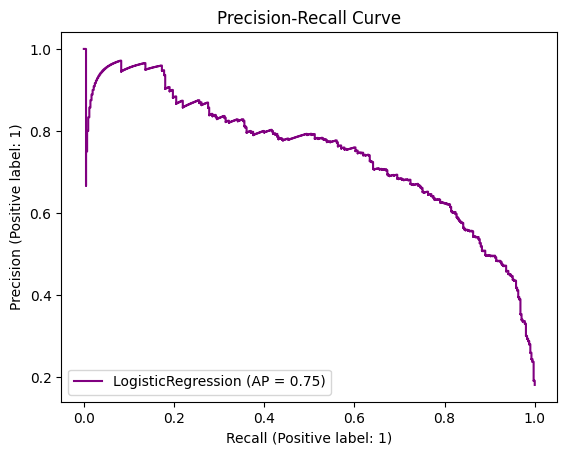

In [54]:
# Plot precision-recall curve
disp = PrecisionRecallDisplay.from_estimator(log, X_test_tf_idf, y_test, color='purple')
disp.ax_.set_title('Precision-Recall Curve')
plt.show()

In [55]:
y_pred = log.predict(X_test_tf_idf)
y_pred_proba= log.predict_proba(X_test_tf_idf)[:,1]


log_AP_tfidf = average_precision_score(y_test, y_pred_proba)
log_tfidf_rec = recall_score(y_test, y_pred)
log_tfidf_f1 = f1_score(y_test,y_pred)

## Naive Bayes

### Countvectorizer

In [56]:
nb = MultinomialNB(alpha=1.5)
nb.fit(X_train_count,y_train)

MultinomialNB(alpha=1.5)

In [57]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

NB MODEL
[[1698  156]
 [  95  315]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1854
           1       0.67      0.77      0.72       410

    accuracy                           0.89      2264
   macro avg       0.81      0.84      0.82      2264
weighted avg       0.90      0.89      0.89      2264

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     16680
           1       0.69      0.80      0.74      3690

    accuracy                           0.90     20370
   macro avg       0.82      0.86      0.84     20370
weighted avg       0.91      0.90      0.90     20370



In [58]:
model = MultinomialNB(alpha=1.5)
scores = cross_validate(model,
                        X_train_count,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.884094
train_accuracy     0.902275
test_f1            0.701349
train_f1           0.748682
test_recall        0.751220
train_recall       0.803553
test_precision     0.658038
train_precision    0.700829
dtype: float64

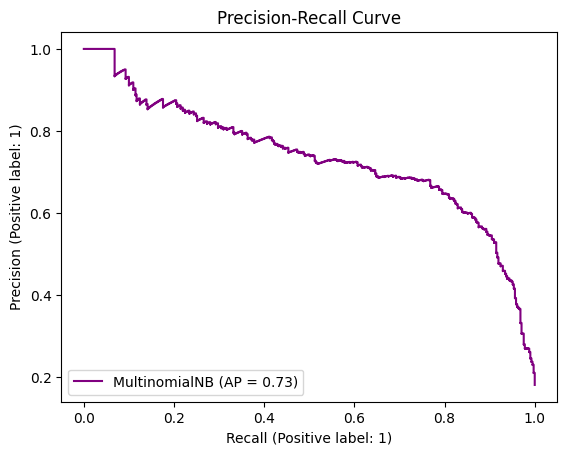

In [59]:
# Plot precision-recall curve
disp = PrecisionRecallDisplay.from_estimator(nb, X_test_count, y_test, color='purple')
disp.ax_.set_title('Precision-Recall Curve')
plt.show()

In [60]:
y_pred = nb.predict(X_test_count)
y_pred_proba= nb.predict_proba(X_test_count)[:,1]

nb_AP_count = average_precision_score(y_test, y_pred_proba)
nb_count_rec = recall_score(y_test, y_pred)
nb_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [61]:
nb = BernoulliNB(alpha=0.7)
nb.fit(X_train_tf_idf,y_train)

BernoulliNB(alpha=0.7)

In [62]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL
[[1687  167]
 [ 104  306]]
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      1854
           1       0.65      0.75      0.69       410

    accuracy                           0.88      2264
   macro avg       0.79      0.83      0.81      2264
weighted avg       0.89      0.88      0.88      2264

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     16680
           1       0.68      0.81      0.74      3690

    accuracy                           0.90     20370
   macro avg       0.82      0.86      0.84     20370
weighted avg       0.91      0.90      0.90     20370



In [63]:
model = BernoulliNB(alpha=0.7)
scores = cross_validate(model,
                        X_train_tf_idf,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.877712
train_accuracy     0.898860
test_f1            0.689111
train_f1           0.743343
test_recall        0.747967
train_recall       0.808522
test_precision     0.639285
train_precision    0.687892
dtype: float64

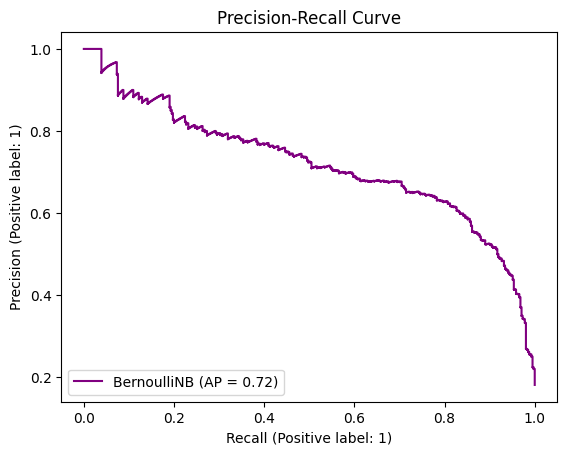

In [64]:
# Plot precision-recall curve
disp = PrecisionRecallDisplay.from_estimator(nb, X_test_tf_idf, y_test, color='purple')
disp.ax_.set_title('Precision-Recall Curve')
plt.show()

In [65]:
y_pred = nb.predict(X_test_tf_idf)
y_pred_proba= nb.predict_proba(X_test_tf_idf)[:,1]


nb_AP_tfidf = average_precision_score(y_test, y_pred_proba)
nb_tfidf_rec = recall_score(y_test, y_pred)
nb_tfidf_f1 = f1_score(y_test,y_pred)

## Support Vector Machine (SVM)

### Countvectorizer

In [66]:
svc = LinearSVC(C=0.001,
                class_weight="balanced",
                random_state=101)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.001, class_weight='balanced', random_state=101)

In [67]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
[[1567  287]
 [  57  353]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      1854
           1       0.55      0.86      0.67       410

    accuracy                           0.85      2264
   macro avg       0.76      0.85      0.79      2264
weighted avg       0.89      0.85      0.86      2264

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     16680
           1       0.58      0.88      0.70      3690

    accuracy                           0.86     20370
   macro avg       0.78      0.87      0.81     20370
weighted avg       0.90      0.86      0.87     20370



In [68]:
model = LinearSVC(C=0.001,
                  class_weight="balanced",
                  random_state=101)
scores = cross_validate(model,
                        X_train_count,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.850614
train_accuracy     0.861670
test_f1            0.673892
train_f1           0.698685
test_recall        0.851762
train_recall       0.885336
test_precision     0.557597
train_precision    0.577034
dtype: float64

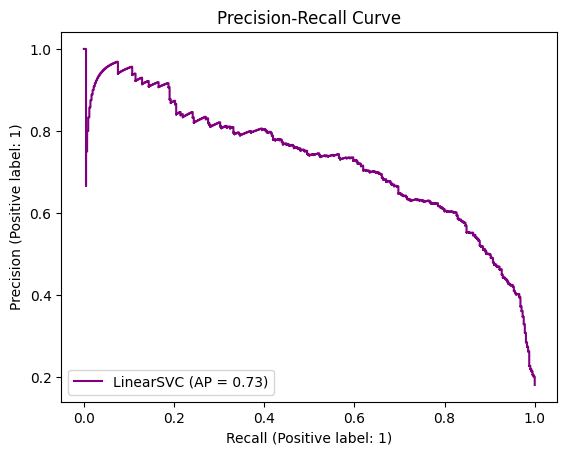

In [69]:
# Plot precision-recall curve
disp = PrecisionRecallDisplay.from_estimator(svc, X_test_count, y_test, color='purple')
disp.ax_.set_title('Precision-Recall Curve')
plt.show()


In [70]:
y_pred = svc.predict(X_test_count)
decision_function= svc.decision_function(X_test_count)

svc_AP_count = average_precision_score(y_test, decision_function)
svc_count_rec = recall_score(y_test, y_pred)
svc_count_f1 = f1_score(y_test,y_pred)

### TD-IDF

In [71]:
svc = LinearSVC(C=0.1)
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.1)

In [72]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[1793   61]
 [ 185  225]]
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1854
           1       0.79      0.55      0.65       410

    accuracy                           0.89      2264
   macro avg       0.85      0.76      0.79      2264
weighted avg       0.88      0.89      0.88      2264

Train_Set
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     16680
           1       0.85      0.61      0.71      3690

    accuracy                           0.91     20370
   macro avg       0.89      0.79      0.83     20370
weighted avg       0.91      0.91      0.90     20370



In [73]:
model = LinearSVC(C=0.03,
                  class_weight="balanced",
                  random_state=101)
scores = cross_validate(model,
                        X_train_tf_idf,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.858763
train_accuracy     0.874292
test_f1            0.689410
train_f1           0.724565
test_recall        0.865312
train_recall       0.912737
test_precision     0.573047
train_precision    0.600724
dtype: float64

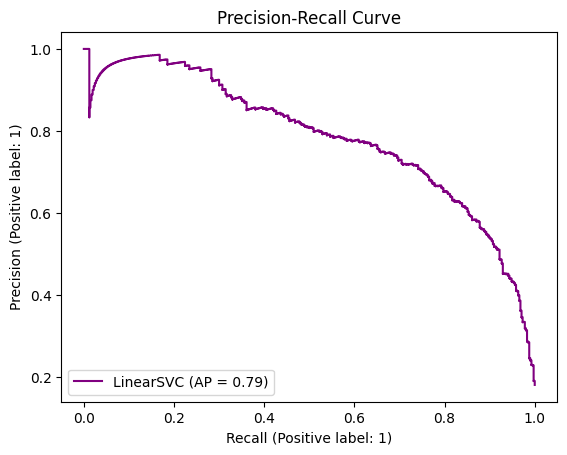

In [74]:
# Plot precision-recall curve
disp = PrecisionRecallDisplay.from_estimator(svc, X_test_tf_idf , y_test, color='purple')
disp.ax_.set_title('Precision-Recall Curve')
plt.show()


In [75]:
y_pred = svc.predict(X_test_tf_idf)
decision_function= svc.decision_function(X_test_tf_idf)

svc_AP_tfidf = average_precision_score(y_test, decision_function)
svc_tfidf_rec = recall_score(y_test, y_pred)
svc_tfidf_f1 = f1_score(y_test,y_pred)

## Random Forest

### Countvectorizer

In [76]:
rf = RandomForestClassifier(100,
                            max_depth = 7,
                            random_state = 42,
                            n_jobs = -1,
                            class_weight="balanced")
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, n_jobs=-1,
                       random_state=42)

In [77]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[1559  295]
 [  81  329]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      1854
           1       0.53      0.80      0.64       410

    accuracy                           0.83      2264
   macro avg       0.74      0.82      0.76      2264
weighted avg       0.87      0.83      0.85      2264

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.85      0.90     16680
           1       0.55      0.84      0.66      3690

    accuracy                           0.84     20370
   macro avg       0.75      0.84      0.78     20370
weighted avg       0.88      0.84      0.86     20370



In [78]:
model = RandomForestClassifier(100,
                               max_depth = 7,
                               random_state = 42,
                               n_jobs = -1,
                               class_weight="balanced")
scores = cross_validate(model,
                        X_train_count,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.823122
train_accuracy     0.843168
test_f1            0.621327
train_f1           0.663468
test_recall        0.801084
train_recall       0.853357
test_precision     0.507776
train_precision    0.542794
dtype: float64

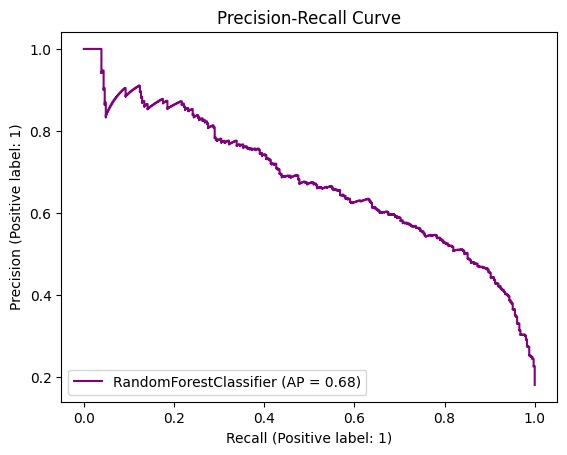

In [79]:
# Plot precision-recall curve
disp = PrecisionRecallDisplay.from_estimator(rf, X_test_count , y_test, color='purple')
disp.ax_.set_title('Precision-Recall Curve')
plt.show()

In [80]:
y_pred = rf.predict(X_test_count)
y_pred_proba= rf.predict_proba(X_test_count)[:,1]

rf_AP_count = average_precision_score(y_test, y_pred_proba)
rf_count_rec = recall_score(y_test, y_pred)
rf_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [81]:
rf = RandomForestClassifier(100,
                            max_depth = 7,
                            random_state = 42,
                            n_jobs = -1,
                            class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, n_jobs=-1,
                       random_state=42)

In [82]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[1542  312]
 [  78  332]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.83      0.89      1854
           1       0.52      0.81      0.63       410

    accuracy                           0.83      2264
   macro avg       0.73      0.82      0.76      2264
weighted avg       0.87      0.83      0.84      2264

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.84      0.90     16680
           1       0.54      0.85      0.67      3690

    accuracy                           0.84     20370
   macro avg       0.75      0.85      0.78     20370
weighted avg       0.89      0.84      0.86     20370



In [83]:
model = RandomForestClassifier(100,
                               max_depth = 7,
                               random_state = 42,
                               n_jobs = -1,
                               class_weight="balanced")
scores = cross_validate(model,
                        X_train_tf_idf,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.816200
train_accuracy     0.839715
test_f1            0.614392
train_f1           0.662735
test_recall        0.807588
train_recall       0.868955
test_precision     0.496126
train_precision    0.535777
dtype: float64

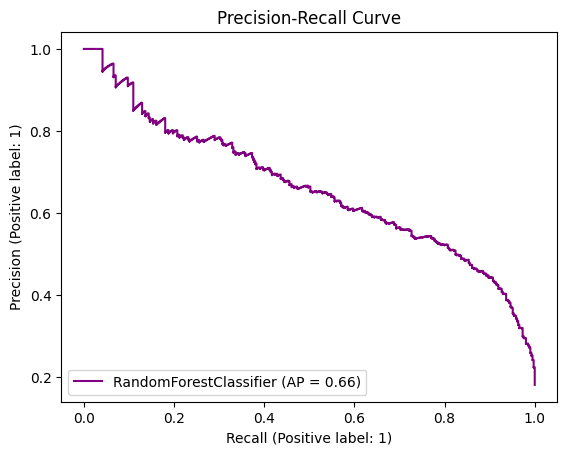

In [84]:
# Plot precision-recall curve
disp = PrecisionRecallDisplay.from_estimator(rf, X_test_tf_idf , y_test, color='purple')
disp.ax_.set_title('Precision-Recall Curve')
plt.show()

In [85]:
y_pred = rf.predict(X_test_tf_idf)
y_pred_proba= rf.predict_proba(X_test_tf_idf)[:,1]

rf_AP_tfidf = average_precision_score(y_test, y_pred_proba)
rf_tfidf_rec = recall_score(y_test, y_pred)
rf_tfidf_f1 = f1_score(y_test,y_pred)

## Ada Boosting

### Countvectorizer

In [86]:
ada = AdaBoostClassifier(n_estimators= 100,
                         random_state = 42)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [87]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL
[[1766   88]
 [ 205  205]]
Test_Set
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1854
           1       0.70      0.50      0.58       410

    accuracy                           0.87      2264
   macro avg       0.80      0.73      0.75      2264
weighted avg       0.86      0.87      0.86      2264

Train_Set
              precision    recall  f1-score   support

           0       0.90      0.95      0.93     16680
           1       0.72      0.52      0.60      3690

    accuracy                           0.88     20370
   macro avg       0.81      0.74      0.76     20370
weighted avg       0.87      0.88      0.87     20370



In [88]:
model = AdaBoostClassifier(n_estimators= 100,
                           random_state = 42)
scores = cross_validate(model,
                        X_train_count,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.870103
train_accuracy     0.876212
test_f1            0.581607
train_f1           0.602618
test_recall        0.498916
train_recall       0.518157
test_precision     0.698545
train_precision    0.720021
dtype: float64

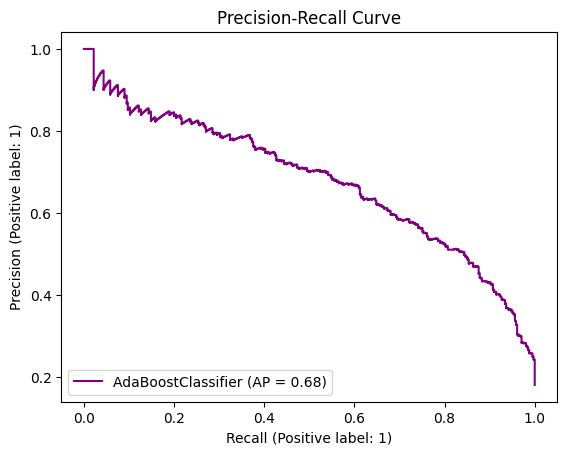

In [89]:
# Plot precision-recall curve
disp = PrecisionRecallDisplay.from_estimator(ada, X_test_count , y_test, color='purple')
disp.ax_.set_title('Precision-Recall Curve')
plt.show()

In [90]:
y_pred = ada.predict(X_test_count)
y_pred_proba= ada.predict_proba(X_test_count)[:,1]

ada_AP_count = average_precision_score(y_test, y_pred_proba)
ada_count_rec = recall_score(y_test, y_pred)
ada_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [91]:
ada = AdaBoostClassifier(n_estimators= 100,
                         random_state = 42,
                         learning_rate=0.7)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(learning_rate=0.7, n_estimators=100, random_state=42)

In [92]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[1794   60]
 [ 230  180]]
Test_Set
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1854
           1       0.75      0.44      0.55       410

    accuracy                           0.87      2264
   macro avg       0.82      0.70      0.74      2264
weighted avg       0.86      0.87      0.86      2264

Train_Set
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     16680
           1       0.76      0.46      0.57      3690

    accuracy                           0.88     20370
   macro avg       0.83      0.71      0.75     20370
weighted avg       0.87      0.88      0.86     20370



In [93]:
model = AdaBoostClassifier(n_estimators= 100,
                           random_state = 42,
                           learning_rate=0.7)
scores = cross_validate(model,
                        X_train_tf_idf,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.866765
train_accuracy     0.877996
test_f1            0.539262
train_f1           0.582018
test_recall        0.430894
train_recall       0.468925
test_precision     0.721618
train_precision    0.767031
dtype: float64

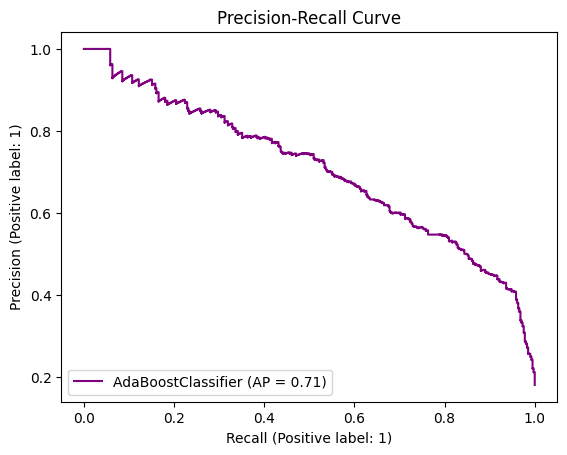

In [94]:
# Plot precision-recall curve
disp = PrecisionRecallDisplay.from_estimator(ada, X_test_tf_idf , y_test, color='purple')
disp.ax_.set_title('Precision-Recall Curve')
plt.show()

In [95]:
y_pred = ada.predict(X_test_tf_idf)
y_pred_proba= ada.predict_proba(X_test_tf_idf)[:,1]

ada_AP_tfidf = average_precision_score(y_test, y_pred_proba)
ada_tfidf_rec = recall_score(y_test, y_pred)
ada_tfidf_f1 = f1_score(y_test,y_pred)

## DL modeling

### Tokenization

In [96]:
# Setting the maximum number of words to consider in Tokenizer
num_words = 15001

# Creating a Tokenizer instance with a specified maximum number of words
tokenizer = Tokenizer(num_words=num_words)

# The 'num_words' parameter sets the maximum number of words to keep, based on word frequency
# The Tokenizer will tokenize the text data and assign a unique integer index to each word, up to the specified limit

In [97]:
# Fitting the Tokenizer on the entire dataset X
tokenizer.fit_on_texts(X)

# The Tokenizer is "fitted" on the text data to generate the vocabulary and index the words
# It assigns a unique integer index to each word based on its frequency in the entire dataset
# The resulting vocabulary is used to convert text data into sequences of integers during text tokenization

### Creating word index

In [98]:
# Accessing the word index generated by the Tokenizer
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'was': 15,
 'so': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'fit': 26,
 'are': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'me': 31,
 'wear': 32,
 "it's": 33,
 'great': 34,
 'too': 35,
 "i'm": 36,
 'or': 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'would': 41,
 'they': 42,
 'up': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'if': 49,
 'more': 50,
 'really': 51,
 'ordered': 52,
 'little': 53,
 'perfect': 54,
 'will': 55,
 'one': 56,
 'these': 57,
 'flattering': 58,
 'well': 59,
 'an': 60,
 'soft': 61,
 'out': 62,
 'back': 63,
 'because': 64,
 'had': 65,
 'can': 66,
 '\r': 67,
 'comfortable': 68,
 'cute': 69,
 'nice': 70,
 'than': 71,
 'bought': 72,
 'beautiful': 73,
 'when': 74,
 'all': 75,
 'looks': 76,
 'bit': 77,
 'fits': 78,
 'large': 79,

In [99]:
len(tokenizer.word_index)

14847

### Converting tokens to numeric

In [100]:
# Converting the text data to sequences of integer tokens using the fitted Tokenizer
X_num_tokens = tokenizer.texts_to_sequences(X)

# The resulting X_num_tokens is a list of sequences, where each sequence represents a document
# Each integer in a sequence corresponds to the index of a word as defined by the Tokenizer's word index
# This conversion is necessary for feeding text data into a neural network or other machine learning models

X_num_tokens

[[253, 532, 917, 3, 662, 3, 68],
 [21,
  7,
  18,
  33,
  1712,
  99,
  2,
  1321,
  8,
  221,
  5,
  9,
  4,
  106,
  3,
  36,
  314,
  2,
  131,
  1243,
  2,
  429,
  41,
  24,
  52,
  5,
  136,
  1243,
  33,
  95,
  2,
  72,
  4,
  95,
  3,
  38,
  501,
  2,
  21,
  1,
  86,
  11,
  31,
  416,
  39,
  4,
  53,
  453,
  1,
  392,
  41,
  155,
  29,
  4,
  130,
  1372,
  11,
  438,
  439,
  6,
  772,
  95],
 [2,
  65,
  313,
  178,
  1095,
  12,
  7,
  18,
  3,
  51,
  195,
  5,
  8,
  102,
  12,
  31,
  2,
  1152,
  52,
  1,
  95,
  46,
  17,
  236,
  22,
  10,
  2,
  219,
  7,
  8,
  29,
  6689,
  46,
  16,
  46,
  9,
  661,
  20,
  2,
  118,
  19,
  784,
  5,
  43,
  2,
  2147,
  5,
  9,
  95,
  97,
  82,
  15,
  39,
  637,
  250,
  1,
  25,
  656,
  15,
  68,
  3,
  26,
  258,
  10,
  1,
  175,
  656,
  65,
  4,
  23,
  148,
  272,
  475,
  3,
  527,
  717,
  489,
  4601,
  151,
  975,
  1876,
  4,
  1877,
  142,
  1589,
  15,
  1,
  4601,
  151,
  475,
  830,
  3246,
  312,
  1,


### Maximum number of tokens for all documents¶

In [101]:
# Calculating the number of tokens in each document after text-to-sequence conversion
num_tokens = [len(tokens) for tokens in X_num_tokens]

# Converting the list of token counts to a NumPy array for further analysis or visualization
num_tokens = np.array(num_tokens)

# The resulting 'num_tokens' array contains the count of tokens in each document after text-to-sequence conversion
# It provides insights into the length distribution of documents in terms of the number of tokens


In [102]:
num_tokens.mean()

60.60934876734117

In [103]:
num_tokens.max()

116

In [104]:
max_tokens = 116

In [105]:
sum(num_tokens <= max_tokens) / len(num_tokens)

# 'num_tokens <= max_tokens' creates a boolean array indicating whether each document has tokens less than or equal to 'max_tokens'
# 'sum(num_tokens <= max_tokens)' counts the number of True values, representing documents within the specified token threshold
# The result is divided by the total number of documents to obtain the proportion

1.0

### Fixing token counts of all documents (pad_sequences)

In [106]:
# Padding the sequences of integer tokens to a specified maximum length
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens, padding="pre")

# 'X_num_tokens' is a list of sequences representing documents with integer tokens
# 'maxlen' specifies the maximum length of the sequences; shorter sequences are padded or truncated accordingly
# 'padding="pre"' indicates that padding is added to the beginning (pre) of each sequence if needed
# The resulting 'X_pad' is a 2D NumPy array containing the padded sequences, ready for model input


In [107]:
X_pad.shape

(22634, 116)

### Train Set Split

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X_pad,
                                                    y,
                                                    test_size=0.1,
                                                    stratify=y,
                                                    random_state=101)

### Modeling

In [109]:
model = Sequential()

In [110]:
embedding_size = 50

In [111]:
# Adding an Embedding layer to the model
# input_dim: Size of the vocabulary, specifying the maximum number of words in the Tokenizer
# output_dim: Dimension of the dense embedding. Each word will be represented by a vector of this size.
# input_length: Length of input sequences (number of tokens)
model.add(Embedding(input_dim=num_words, output_dim=embedding_size, input_length=max_tokens))

# Adding a Dropout layer to prevent overfitting
model.add(Dropout(0.2))

# Adding a GRU (Gated Recurrent Unit) layer with 50 units and return sequences for the first layer
model.add(GRU(units=50, return_sequences=True))

# Adding a Dropout layer to prevent overfitting
model.add(Dropout(0.2))

# Adding another GRU layer with 25 units and return sequences
model.add(GRU(units=25, return_sequences=True))

# Adding a Dropout layer to prevent overfitting
model.add(Dropout(0.2))

# Adding another GRU layer with 12 units
model.add(GRU(units=12))

# Adding a Dropout layer to prevent overfitting
model.add(Dropout(0.2))

# Adding a Dense layer with 1 unit and a sigmoid activation function for binary classification
model.add(Dense(1, activation='sigmoid'))


In [112]:
optimizer = Adam(learning_rate=0.001)

In [113]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=["Recall"])

In [114]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 116, 50)           750050    
                                                                 
 dropout (Dropout)           (None, 116, 50)           0         
                                                                 
 gru (GRU)                   (None, 116, 50)           15300     
                                                                 
 dropout_1 (Dropout)         (None, 116, 50)           0         
                                                                 
 gru_1 (GRU)                 (None, 116, 25)           5775      
                                                                 
 dropout_2 (Dropout)         (None, 116, 25)           0         
                                                                 
 gru_2 (GRU)                 (None, 12)                1

In [115]:
early_stop = EarlyStopping(monitor="val_recall",
                           mode="max",
                           verbose=1,
                           patience = 2,
                           restore_best_weights=True)

In [116]:
classes_weights = class_weight.compute_sample_weight(class_weight='balanced',
                                                     y=y_train)
pd.Series(classes_weights).unique()

array([0.61061151, 2.7601626 ])

In [117]:
model.fit(X_train, y_train, epochs=10, batch_size=128, sample_weight=classes_weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/10
160/160 [==============================] - 33s 160ms/step - loss: 0.4782 - recall: 0.7751 - val_loss: 0.4370 - val_recall: 0.9390
Epoch 2/10
160/160 [==============================] - 24s 147ms/step - loss: 0.2944 - recall: 0.9117 - val_loss: 0.2996 - val_recall: 0.8341
Epoch 3/10
160/160 [==============================] - 23s 147ms/step - loss: 0.2439 - recall: 0.9293 - val_loss: 0.3074 - val_recall: 0.7585
Epoch 3: early stopping


### Model Evaluation

In [118]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.478230,0.775068,0.437047,0.939024
1,0.294418,0.911653,0.299613,0.834146
2,0.243892,0.929268,0.307355,0.758537


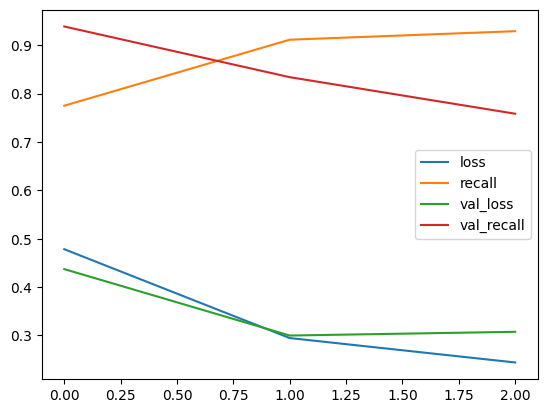

In [119]:
model_loss.plot();

In [120]:
y_pred = model.predict(X_test) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

71/71 [==============================] - 3s 24ms/step
[[1421  433]
 [  25  385]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.77      0.86      1854
           1       0.47      0.94      0.63       410

    accuracy                           0.80      2264
   macro avg       0.73      0.85      0.74      2264
weighted avg       0.89      0.80      0.82      2264



In [121]:
y_train_pred = model.predict(X_train) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

637/637 [==============================] - 13s 20ms/step
[[13353  3327]
 [  149  3541]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.80      0.88     16680
           1       0.52      0.96      0.67      3690

    accuracy                           0.83     20370
   macro avg       0.75      0.88      0.78     20370
weighted avg       0.90      0.83      0.85     20370



71/71 [==============================] - 1s 20ms/step


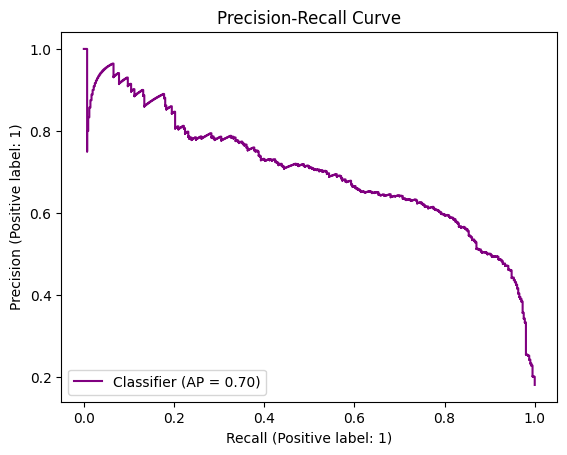

In [122]:
y_pred_proba = model.predict(X_test)

# Plot precision-recall curve with a custom color (e.g., 'purple')
disp = PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba, color='purple')

# Set the title for the plot
disp.ax_.set_title('Precision-Recall Curve')

# Show the plot
plt.show()

In [123]:
DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)

In [124]:
average_precision_score(y_test, y_pred_proba)

0.7010947289471108

## BERT Modeling

### Tokenization

In [125]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# For every sentence...
num_of_sent_tokens = []
for sent in X:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.

    input_ids = tokenizer.encode(sent,
                                 add_special_tokens=True)
    num_of_sent_tokens.append(len(input_ids))

print('Max sentence length: ', max(num_of_sent_tokens))

Max sentence length:  162


In [126]:
np.array(num_of_sent_tokens).mean()

76.75947689316956

In [127]:
sum(np.array(num_of_sent_tokens) <= 162) / len(num_of_sent_tokens)

1.0

### Train test split

In [128]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,
                                                        y,
                                                        test_size=0.1,
                                                        stratify=y,
                                                        random_state=101)

In [129]:
all_sentence_tokens = tokenizer(list(X),
                                max_length=162,
                                truncation=True,
                                padding='max_length',
                                add_special_tokens=True)

In [130]:
np.array(all_sentence_tokens['input_ids'])

array([[ 101, 7078, 6919, ...,    0,    0,    0],
       [ 101, 2293, 2023, ...,    0,    0,    0],
       [ 101, 1045, 2018, ...,    0,    0,    0],
       ...,
       [ 101, 2023, 4906, ...,    0,    0,    0],
       [ 101, 1045, 4149, ...,    0,    0,    0],
       [ 101, 2023, 4377, ...,    0,    0,    0]])

In [131]:
# Converting the 'attention_mask' column from the DataFrame 'all_sentence_tokens' to a NumPy array
attention_mask_array = np.array(all_sentence_tokens['attention_mask'])

# The resulting 'attention_mask_array' is a NumPy array containing the attention masks for each sentence
# Attention masks are used in natural language processing tasks to indicate which tokens should be attended to (1) or ignored (0)

In [132]:
def transformation(X):
    """
    Tokenizes and transforms the input sentences using a specified tokenizer.

    Parameters:
    - X: List or array-like containing input sentences.

    Returns:
    - Tuple: Two NumPy arrays representing the tokenized input_ids and attention_mask.
    """

    # Set array dimensions
    seq_len = 162

    # Tokenizing the input sentences using the specified tokenizer
    all_sentence_tokens = tokenizer(list(X),
                                     max_length=seq_len,
                                     truncation=True,
                                     padding='max_length',
                                     add_special_tokens=True)

    # Extracting the 'input_ids' and 'attention_mask' from the tokenized result
    return np.array(all_sentence_tokens['input_ids']), np.array(all_sentence_tokens['attention_mask'])

In [133]:
# Tokenizing and transforming the training data using the 'transformation' function
Xids_train, Xmask_train = transformation(X_train2)

# Tokenizing and transforming the test data using the 'transformation' function
Xids_test, Xmask_test = transformation(X_test2)

In [134]:
Xids_train

array([[  101,  1045,  7078, ...,     0,     0,     0],
       [  101,  1045,  2293, ...,     0,     0,     0],
       [  101,  2023,  2327, ...,     0,     0,     0],
       ...,
       [  101,  2023,  4377, ...,     0,     0,     0],
       [  101, 10140,  2640, ...,     0,     0,     0],
       [  101,  1045,  3641, ...,     0,     0,     0]])

In [135]:
print("Xids_train.shape  :", Xids_train.shape)
print("Xmask_train.shape :", Xmask_train.shape)
print("Xids_test.shape   :", Xids_test.shape)
print("Xmask_test.shape  :", Xmask_test.shape)

Xids_train.shape  : (20370, 162)
Xmask_train.shape : (20370, 162)
Xids_test.shape   : (2264, 162)
Xmask_test.shape  : (2264, 162)


In [136]:
labels_train = y_train2.reshape(-1,1)
labels_train

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

In [137]:
labels_test = y_test2.reshape(-1,1)
labels_test

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

### Transformation Matrix to Tensorflow tensor

In [138]:
# Creating a TensorFlow dataset from the training data
dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train,
                                                    Xmask_train,
                                                    labels_train))

# The resulting 'dataset_train' is a TensorFlow dataset containing slices of input_ids, attention_mask, and labels for training

In [139]:
# Creating a TensorFlow dataset from the test data
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test,
                                                   Xmask_test,
                                                   labels_test))

# The resulting 'dataset_test' is a TensorFlow dataset containing slices of input_ids, attention_mask, and labels for testing

In [140]:
def map_func(Tensor_Xids, Tensor_Xmask, Tensor_labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Tensor_Xids, 'attention_mask': Tensor_Xmask}, Tensor_labels

In [141]:
# then we use the dataset map method to apply this transformation
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func)

In [142]:
dataset_train

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [143]:
dataset_test

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

### Batch Size

In [144]:
batch_size = 32

# batch_size
# fit into a batch of 32
train_ds = dataset_train.batch(batch_size)
val_ds = dataset_test.batch(batch_size)

In [145]:
!pip install -q tf-models-official

In [146]:
from official.nlp import optimization

# Setting the number of training epochs
epochs = 2

# Calculating the number of steps per epoch (assuming 'train_ds' is your training dataset)
steps_per_epoch = len(train_ds)

# Calculating the total number of training steps
num_train_steps = steps_per_epoch * epochs

# Calculating the number of warm-up steps (10% of total training steps)
num_warmup_steps = int(0.1 * num_train_steps)

# Initial learning rate for the optimizer
init_lr = 2e-5  # You can experiment with different initial learning rates (e.g., 3e-5, 5e-5)

# Creating an AdamW optimizer with a linear learning rate schedule and warm-up steps
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [147]:
print(len(train_ds)*2)
print(int(0.1*len(train_ds)*2))

1274
127


### Creating Model with TPU

In [148]:
def create_model():
    """
    Create a custom model using the transformers library for BERT-based text classification.

    Returns:
    - Model: A TensorFlow/Keras model with BERT-based architecture for text classification.
    """

    # Importing necessary modules
    from transformers import TFAutoModel
    from tensorflow.keras.layers import Input, Dropout, Dense, BatchNormalization
    from tensorflow.keras import Model

    # Load the pre-trained BERT model
    model = TFAutoModel.from_pretrained("bert-base-uncased")

    # Define input layers for tokenized input_ids and attention_mask
    input_ids = Input(shape=(162,), name='input_ids', dtype='int32')
    attention_mask = Input(shape=(162,), name='attention_mask', dtype='int32')

    # Extract embeddings from the BERT model using tokenized input
    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"]

    # Additional layers for fine-tuning and classification
    x = Dense(80, activation='relu')(embeddings)
    x = BatchNormalization()(x)
    x = Dropout(0.1, name="dropout")(x)  # Adjust dropout rate as needed
    y = Dense(1, activation='sigmoid', name='outputs')(x)

    # Creating and returning the final model
    return Model(inputs=[input_ids, attention_mask], outputs=y)

In [149]:
with strategy.scope():
    # Using the distributed training strategy scope for multi-GPU training

    # Setting the optimizer, loss function, and metrics within the strategy scope
    optimizer = optimizer  # The previously defined AdamW optimizer
    loss = tf.keras.losses.BinaryCrossentropy()  # Binary Crossentropy loss for binary classification
    recall = tf.keras.metrics.Recall()  # Recall as an additional evaluation metric

    # Creating the model within the strategy scope
    model3 = create_model()

    # Compiling the model with the specified optimizer, loss function, and metrics
    model3.compile(optimizer=optimizer, loss=loss, metrics=[recall])

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [150]:
model3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 162)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 162)]                0         []                            
 )                                                                                                
                                                                                                  
 bert (TFBertMainLayer)      TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
                             ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 162, 7                                       

In [151]:
model3.fit(train_ds, validation_data= val_ds, epochs=epochs)

Epoch 1/2
637/637 [==============================] - 257s 211ms/step - loss: 0.5908 - recall: 0.8073 - val_loss: 0.3576 - val_recall: 0.8171
Epoch 2/2
637/637 [==============================] - 73s 114ms/step - loss: 0.4880 - recall: 0.8696 - val_loss: 0.4580 - val_recall: 0.8854


### Model evaluation

In [152]:
model_loss = pd.DataFrame(model3.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.590818,0.807317,0.357594,0.817073
1,0.487990,0.869648,0.457996,0.885366


<Axes: >

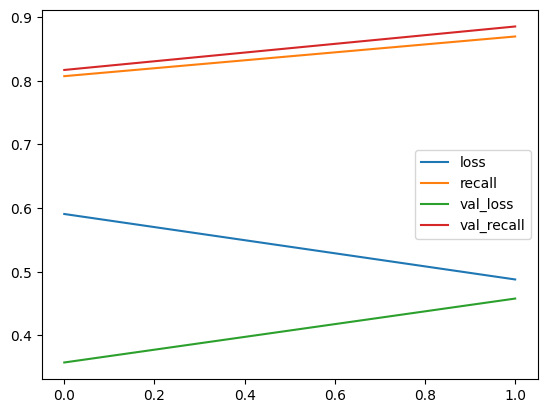

In [153]:
model_loss.plot()

In [154]:
y_pred = model3.predict(val_ds) >= 0.5

print(classification_report(y_test2, y_pred))

71/71 [==============================] - 19s 179ms/step
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1854
           1       0.72      0.89      0.80       410

    accuracy                           0.92      2264
   macro avg       0.85      0.91      0.87      2264
weighted avg       0.93      0.92      0.92      2264



In [155]:
y_train_pred = model3.predict(train_ds) >= 0.5

print(classification_report(y_train2, y_train_pred))

637/637 [==============================] - 22s 32ms/step
              precision    recall  f1-score   support

           0       0.98      0.95      0.96     16680
           1       0.80      0.90      0.85      3690

    accuracy                           0.94     20370
   macro avg       0.89      0.93      0.91     20370
weighted avg       0.95      0.94      0.94     20370



71/71 [==============================] - 4s 32ms/step


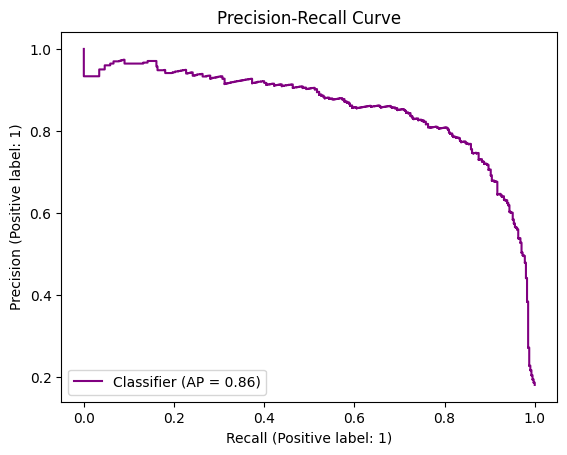

In [156]:
y_pred_proba = model3.predict(val_ds)

# Plot precision-recall curve
disp = PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba, color='purple')
disp.ax_.set_title('Precision-Recall Curve')
plt.show()


In [157]:
BERT_without_weighted_AP = average_precision_score(y_test2, y_pred_proba)
BERT_without_weighted_f1 = f1_score(y_test2, y_pred)
BERT_without_weighted_rec = recall_score(y_test2, y_pred)

In [158]:
average_precision_score(y_test2, y_pred_proba)

0.8551635756793796

## BERT Model with Weighted

In [159]:
def create_model():
    """
    Create a custom model using the transformers library for BERT-based text classification.

    Returns:
    - Model: A TensorFlow/Keras model with BERT-based architecture for text classification.
    """

    # Importing necessary modules
    from transformers import TFAutoModel
    from tensorflow.keras.layers import Input, Dropout, Dense, BatchNormalization
    from tensorflow.keras import Model

    # Load the pre-trained BERT model
    model = TFAutoModel.from_pretrained("bert-base-uncased")

    # Define input layers for tokenized input_ids and attention_mask
    input_ids = Input(shape=(162,), name='input_ids', dtype='int32')
    attention_mask = Input(shape=(162,), name='attention_mask', dtype='int32')

    # Extract embeddings from the BERT model using tokenized input
    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"]

    # Additional layers for fine-tuning and classification
    x = Dense(80, activation='relu')(embeddings)
    x = BatchNormalization()(x)
    x = Dropout(0.1, name="dropout")(x)  # Adjust dropout rate as needed
    y = Dense(1, activation='sigmoid', name='outputs')(x)

    # Creating and returning the final model
    return Model(inputs=[input_ids, attention_mask], outputs=y)


In [160]:
# Setting the number of training epochs
epochs = 2

# Calculating the number of steps per epoch (assuming 'train_ds' is your training dataset)
steps_per_epoch = len(train_ds)

# Calculating the total number of training steps
num_train_steps = steps_per_epoch * epochs

# Calculating the number of warm-up steps (10% of total training steps)
num_warmup_steps = int(0.1 * num_train_steps)

# Initial learning rate for the optimizer
init_lr = 2e-5  # You can experiment with different initial learning rates (e.g., 3e-5, 5e-5)

# Creating an AdamW optimizer with a linear learning rate schedule and warm-up steps
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [161]:
# Using the distributed training strategy scope for multi-GPU training
with strategy.scope():
    # Setting the optimizer, loss function, and metrics within the strategy scope
    optimizer = optimizer  # The previously defined AdamW optimizer
    loss = tf.keras.losses.BinaryCrossentropy()  # Binary Crossentropy loss for binary classification
    recall = tf.keras.metrics.Recall()  # Recall as an additional evaluation metric

    # Creating the model within the strategy scope
    model3 = create_model()

    # Compiling the model with the specified optimizer, loss function, and metrics
    model3.compile(optimizer=optimizer, loss=loss, metrics=[recall])

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [162]:
pd.Series(y).value_counts(normalize=True)

0    0.818857
1    0.181143
dtype: float64

In [163]:
weights = {0:0.18, 1:0.81}

In [164]:
model3.fit(
    train_ds, validation_data= val_ds,
    epochs=epochs, class_weight=weights)

Epoch 1/2
637/637 [==============================] - 218s 209ms/step - loss: 0.1426 - recall_1: 0.8577 - val_loss: 0.6823 - val_recall_1: 0.9634
Epoch 2/2
637/637 [==============================] - 73s 115ms/step - loss: 0.1119 - recall_1: 0.9279 - val_loss: 0.4507 - val_recall_1: 0.9244


In [165]:
y_pred = model3.predict(val_ds) >= 0.5


print(classification_report(y_test2, y_pred))

71/71 [==============================] - 20s 178ms/step
              precision    recall  f1-score   support

           0       0.98      0.89      0.93      1854
           1       0.64      0.92      0.76       410

    accuracy                           0.89      2264
   macro avg       0.81      0.91      0.85      2264
weighted avg       0.92      0.89      0.90      2264



In [166]:
y_train_pred = model3.predict(train_ds) >= 0.5


print(classification_report(y_train2, y_train_pred))

637/637 [==============================] - 21s 30ms/step
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     16680
           1       0.70      0.95      0.81      3690

    accuracy                           0.92     20370
   macro avg       0.84      0.93      0.88     20370
weighted avg       0.94      0.92      0.92     20370



In [167]:
y_pred_proba = model3.predict(val_ds)
average_precision_score(y_test2, y_pred_proba)

71/71 [==============================] - 4s 32ms/step


0.8492413547444821

In [168]:
# Calculating the Average Precision (AP) score using the predicted probabilities
BERT_with_weighted_AP = average_precision_score(y_test2, y_pred_proba)

# Calculating the F1 score using the predicted labels
BERT_with_weighted_f1 = f1_score(y_test2, y_pred)

# Calculating the Recall score using the predicted labels
BERT_with_weighted_rec = recall_score(y_test2, y_pred)

### Compare Models F1 Scores, Recall Scores and Average Precision Score

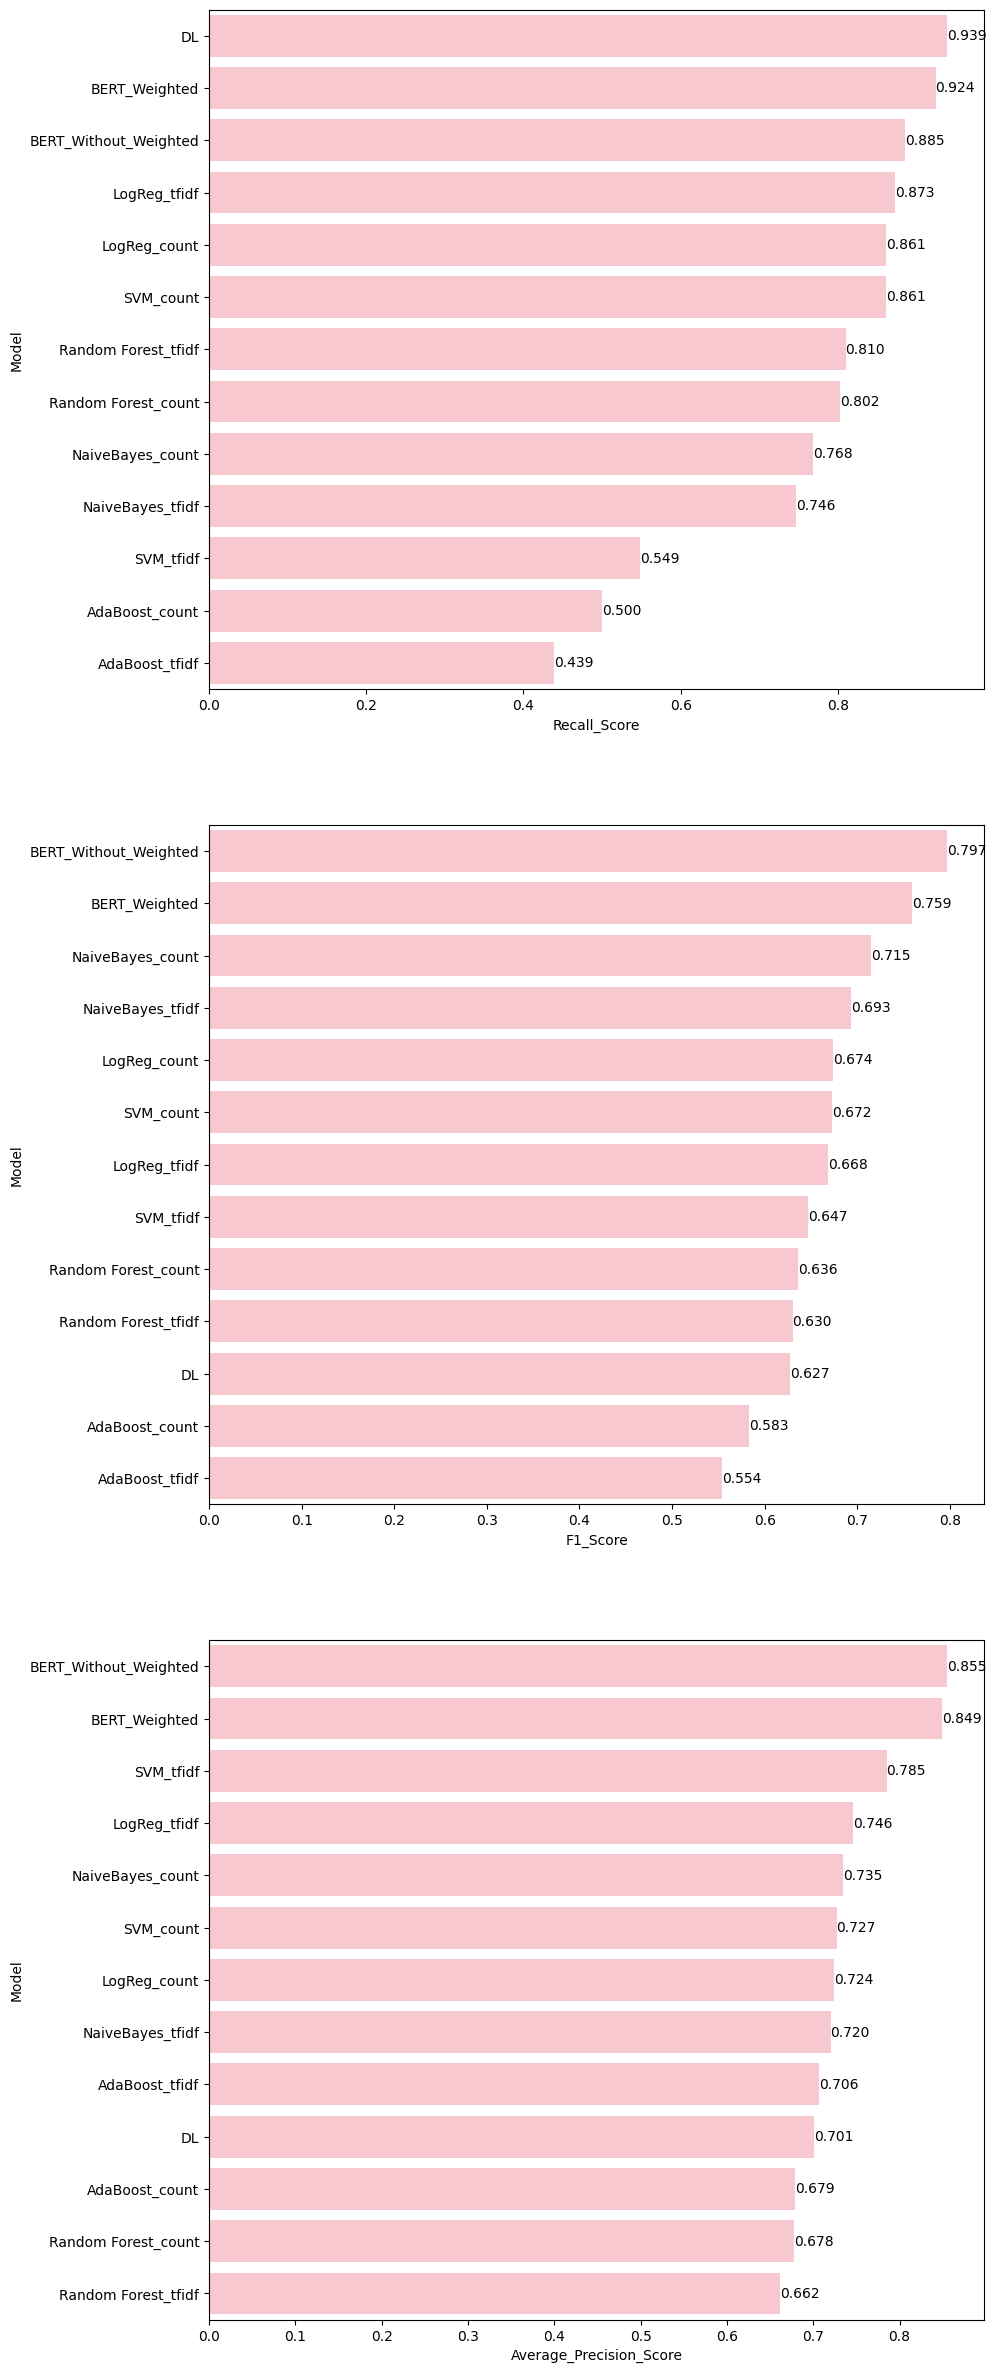

In [169]:
# Creating a DataFrame 'compare' to store evaluation metrics for different models
compare = pd.DataFrame({
    "Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count",
              "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf",
              "Random Forest_tfidf", "AdaBoost_tfidf", "DL", "BERT_Weighted", "BERT_Without_Weighted"],
    "F1_Score": [nb_count_f1, log_count_f1, svc_count_f1, rf_count_f1, ada_count_f1, nb_tfidf_f1,
                 log_tfidf_f1, svc_tfidf_f1, rf_tfidf_f1, ada_tfidf_f1, DL_f1, BERT_with_weighted_f1,
                 BERT_without_weighted_f1],
    "Recall_Score": [nb_count_rec, log_count_rec, svc_count_rec, rf_count_rec, ada_count_rec, nb_tfidf_rec,
                     log_tfidf_rec, svc_tfidf_rec, rf_tfidf_rec, ada_tfidf_rec, DL_rec, BERT_with_weighted_rec,
                     BERT_without_weighted_rec],
    "Average_Precision_Score": [nb_AP_count, log_AP_count, svc_AP_count, rf_AP_count, ada_AP_count, nb_AP_tfidf,
                                log_AP_tfidf, svc_AP_tfidf, rf_AP_tfidf, ada_AP_tfidf, DL_AP, BERT_with_weighted_AP,
                                BERT_without_weighted_AP]
})

# Setting the figure size for the entire subplot
plt.figure(figsize=(10, 30))

# Subplot 1: Bar plot for Recall Scores
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score", ascending=False)
ax = sns.barplot(x="Recall_Score", y="Model", data=compare, color='pink')
ax.bar_label(ax.containers[0], fmt="%.3f")  # Adding labels to the bars

# Subplot 2: Bar plot for F1 Scores
plt.subplot(312)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax = sns.barplot(x="F1_Score", y="Model", data=compare, color='pink')
ax.bar_label(ax.containers[0], fmt="%.3f")  # Adding labels to the bars

# Subplot 3: Bar plot for Average Precision Scores
plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score", ascending=False)
ax = sns.barplot(x="Average_Precision_Score", y="Model", data=compare, color='pink')
ax.bar_label(ax.containers[0], fmt="%.3f")  # Adding labels to the bars

# Displaying the entire subplot
plt.show()


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___